In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import matplotlib.patches as patch

In [2]:
HP047 = pd.read_excel("2017-12-13 Expression data for A419 resistant cells.xlsx", sheet_name='HP-047')
HP051 = pd.read_excel("2017-12-13 Expression data for A419 resistant cells.xlsx", sheet_name='HP-051')
HP069 = pd.read_excel("2017-12-13 Expression data for A419 resistant cells.xlsx", sheet_name='HP-069')
HP078 = pd.read_excel("2017-12-13 Expression data for A419 resistant cells.xlsx", sheet_name='HP-078')
HP079 = pd.read_excel("2017-12-13 Expression data for A419 resistant cells.xlsx", sheet_name='HP-079')
HP080 = pd.read_excel("2017-12-13 Expression data for A419 resistant cells.xlsx", sheet_name='HP-080')
HP093 = pd.read_excel("2017-12-13 Expression data for A419 resistant cells.xlsx", sheet_name='HP-093')
HP104 = pd.read_excel("2017-12-13 Expression data for A419 resistant cells.xlsx", sheet_name='HP-104')
HP175 = pd.read_excel("2017-12-13 Expression data for A419 resistant cells.xlsx", sheet_name='HP-175')
HP194 = pd.read_excel("2017-12-13 Expression data for A419 resistant cells.xlsx", sheet_name='HP-194')
HP196 = pd.read_excel("2017-12-13 Expression data for A419 resistant cells.xlsx", sheet_name='HP-196')
HP239 = pd.read_excel("2017-12-13 Expression data for A419 resistant cells.xlsx", sheet_name='HP-239')
HP289 = pd.read_excel("2017-12-13 Expression data for A419 resistant cells.xlsx", sheet_name='HP-289')
HP332 = pd.read_excel("2017-12-13 Expression data for A419 resistant cells.xlsx", sheet_name='HP-332')
HP388 = pd.read_excel("2017-12-13 Expression data for A419 resistant cells.xlsx", sheet_name='HP-388')
HP397 = pd.read_excel("2017-12-13 Expression data for A419 resistant cells.xlsx", sheet_name='HP-397')
HP410 = pd.read_excel("2017-12-13 Expression data for A419 resistant cells.xlsx", sheet_name='HP-410')
HP419 = pd.read_excel("2017-12-13 Expression data for A419 resistant cells.xlsx", sheet_name='HP-419')
HP451 = pd.read_excel("2017-12-13 Expression data for A419 resistant cells.xlsx", sheet_name='HP-451')
HP453 = pd.read_excel("2017-12-13 Expression data for A419 resistant cells.xlsx", sheet_name='HP-453')
HP454 = pd.read_excel("2017-12-13 Expression data for A419 resistant cells.xlsx", sheet_name='HP-454')
HP465 = pd.read_excel("2017-12-13 Expression data for A419 resistant cells.xlsx", sheet_name='HP-465')
HP488 = pd.read_excel("2017-12-13 Expression data for A419 resistant cells.xlsx", sheet_name='HP-488')
HP490 = pd.read_excel("2017-12-13 Expression data for A419 resistant cells.xlsx", sheet_name='HP-490')
HP505 = pd.read_excel("2017-12-13 Expression data for A419 resistant cells.xlsx", sheet_name='HP-505')
HP515 = pd.read_excel("2017-12-13 Expression data for A419 resistant cells.xlsx", sheet_name='HP-515')
HP548 = pd.read_excel("2017-12-13 Expression data for A419 resistant cells.xlsx", sheet_name='HP-548')

MV411 = pd.read_excel("2017-12-13 Expression data for A419 resistant cells.xlsx", sheet_name='MV4-11')
MOLM13 = pd.read_excel("2017-12-13 Expression data for A419 resistant cells.xlsx", sheet_name='MOLM-13')
MOLM14 = pd.read_excel("2017-12-13 Expression data for A419 resistant cells.xlsx", sheet_name='MOLM-14')

In [3]:
#Make a function to clean the data
def simplify(data, skipnum):
    data = data.iloc[::skipnum,[0]+[-1]] #Only keep every sixth row (contains summary data), Only keep the first and last column
    data.columns = ['Gene', 'Exp'] #Rename the columns
    data['Gene'] = data['Gene'].str.title() #Convert gene names to Titlecase
    return data

In [4]:
#Iterate simplify over all the Patient data (which is formated the same) and then each cell line

Patient_data = [HP047,HP051,HP069,HP078,HP079,HP080,HP093,HP104,HP175,HP194,HP196,HP239,HP289,
              HP332,HP388,HP397,HP410,HP419,HP451,HP453,HP454,HP465,HP488,HP490,HP505,HP515,
              HP548]

count = 0
for i in Patient_data: 
    Patient_data[count] = simplify(i,6)
    count = count + 1
    
MV411= simplify(MV411,6)
MOLM13 = simplify(MOLM13,9)
MOLM14= simplify(MOLM14,9)

#Make a label column for each cell line
MV411['label'] = 'MV4-11'

#Combine the patient data
patientDF = pd.concat(Patient_data, axis =0)

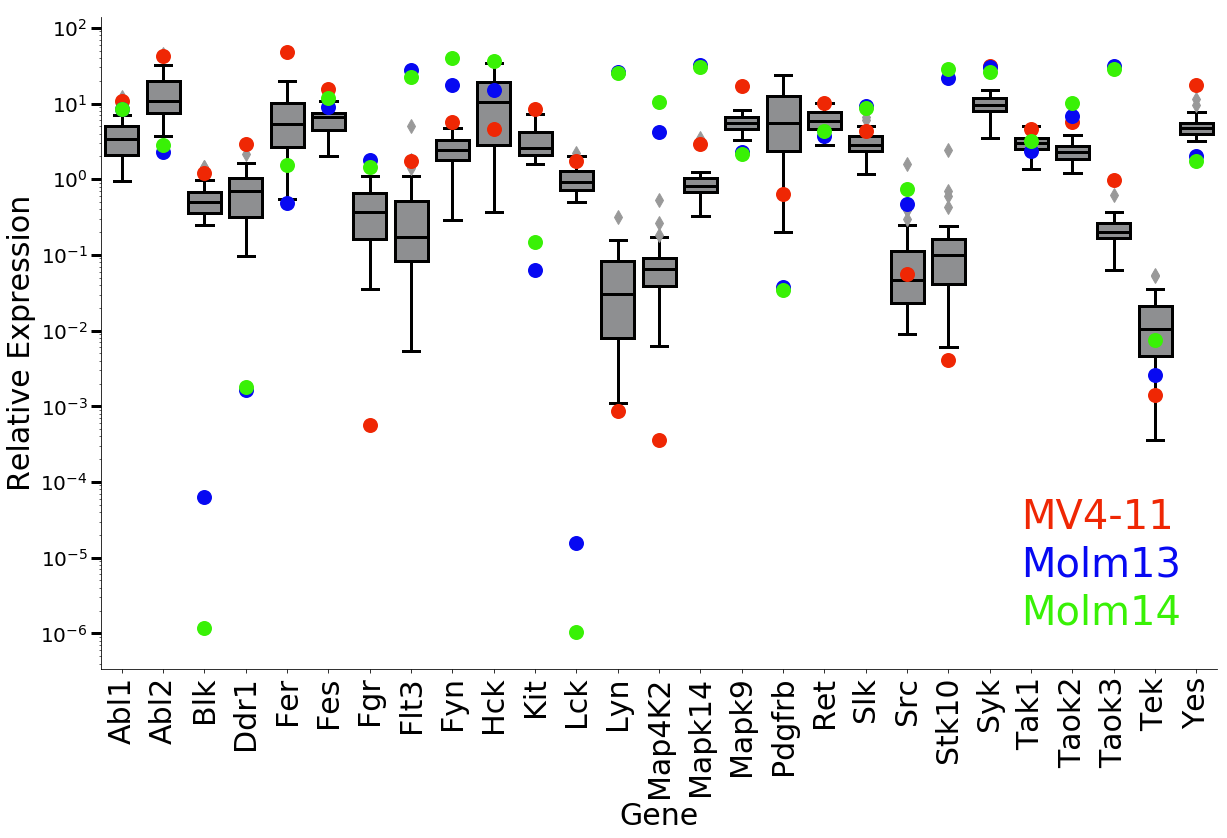

In [5]:
fig, ax = plt.subplots()
fig.set_size_inches(20,12)
ax.set(yscale='log')

#Boxplot of the clinical samples
ax = sns.boxplot(x="Gene", y="Exp", data=patientDF, color = 'w', linewidth = 3, fliersize=10)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, size= 30)
ax.axes.get_xaxis().get_label().set_fontsize(30)
ax.tick_params(axis = 'y', which = 'major', labelsize = 20, length= 10, width = 3)
plt.setp(ax.artists, edgecolor = 'k', facecolor='#8e8f91')
plt.setp(ax.lines, color='k')

#Plot each cell line as a single point
ax = sns.swarmplot(x="Gene", y="Exp", data=MV411, color="#ef2704", size =15)
ax = sns.swarmplot(x="Gene", y="Exp", data=MOLM13, color="#0709f2", size =15)
ax = sns.swarmplot(x="Gene", y="Exp", data=MOLM14, color="#39f106", size =15)
plt.ylabel('Relative Expression').set_fontsize(30)


#Make and format the legend
def create_proxy(label):
    line = mpl.lines.Line2D([0], [0], linestyle='none', mfc='black', mec='none', marker=r'$\mathregular{{{}}}$'.format(label))
    return line
labels = ['MV4-11', 'Molm13', 'Molm14']
descriptions = ['MV4-11', 'Molm13', 'Molm14']
proxies = [create_proxy(item) for item in labels]
leg = ax.legend(proxies, descriptions, numpoints=1, markerscale=0, fontsize=40, frameon=False, labelspacing=0.2)
for text, color in zip(leg.get_texts(), ["#ef2704", "#0709f2", "#39f106"]): text.set_color(color)


plt.show()

In [6]:
fig.savefig("Supp Fig 4.pdf", bbox_inches='tight')

fig.savefig("Supp Fig 4.png", bbox_inches='tight')